TerminalInfo(community_account=False, community_connection=False, connected=True, dlls_allowed=False, trade_allowed=False, tradeapi_disabled=False, email_enabled=False, ftp_enabled=False, notifications_enabled=False, mqid=False, build=2980, maxbars=100000, codepage=1252, ping_last=177198, community_balance=0.0, retransmission=0.0, company='MetaQuotes Software Corp.', name='MetaTrader', language='Spanish', path='C:\\Program Files\\MetaTrader', data_path='C:\\Users\\Daniel Chávez\\AppData\\Roaming\\MetaQuotes\\Terminal\\F762D69EEEA9B4430D7F17C82167C844', commondata_path='C:\\Users\\Daniel Chávez\\AppData\\Roaming\\MetaQuotes\\Terminal\\Common')
(500, 2980, '18 Jun 2021')
euraud_ticks( 1000 )
(1624039200, 1.58406, 1.58436, 0., 0, 1624039200031, 134, 0.)
(1624039200, 1.58407, 1.58439, 0., 0, 1624039200177, 134, 0.)
(1624039200, 1.58406, 1.58437, 0., 0, 1624039200283, 134, 0.)
(1624039200, 1.58412, 1.5844, 0., 0, 1624039200411, 134, 0.)
(1624039200, 1.5841, 1.58439, 0., 0, 1624039200531, 13

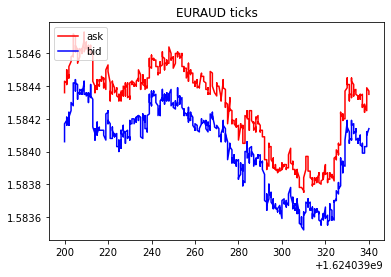

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import MetaTrader5 as mt5
 
# conectamos con MetaTrader 5
if not mt5.initialize():
    print("initialize() failed")
    mt5.shutdown()
 
# solicitamos el estado y los parámetros de conexión
print(mt5.terminal_info())
# obtenemos la información sobre la versión de MetaTrader 5
print(mt5.version())
 
# solicitamos 1000 ticks de EURAUD
euraud_ticks = mt5.copy_ticks_from("EURAUD", datetime(2021,6,18,13), 1000, mt5.COPY_TICKS_ALL)
# solicitamos los ticks de AUDUSD en el intervalo 2019.04.01 13:00 - 2019.04.02 13:00
audusd_ticks = mt5.copy_ticks_range("AUDUSD", datetime(2021,6,17,13), datetime(2021,6,18,13), mt5.COPY_TICKS_ALL)
 
# obtenemos con distintos métodos las barras de diferentes instrumentos
eurusd_rates = mt5.copy_rates_from("EURUSD", mt5.TIMEFRAME_M1, datetime(2021,6,18,13), 1000)
eurgbp_rates = mt5.copy_rates_from_pos("EURGBP", mt5.TIMEFRAME_M1, 0, 1000)
eurcad_rates = mt5.copy_rates_range("EURCAD", mt5.TIMEFRAME_M1, datetime(2021,6,17,13), datetime(2021,6,18,13))
 
# finalizamos la conexión con MetaTrader 5
mt5.shutdown()
 
#DATA
print('euraud_ticks(', len(euraud_ticks), ')')
for val in euraud_ticks[:10]: print(val)
 
print('audusd_ticks(', len(audusd_ticks), ')')
for val in audusd_ticks[:10]: print(val)
 
print('eurusd_rates(', len(eurusd_rates), ')')
for val in eurusd_rates[:10]: print(val)
 
print('eurgbp_rates(', len(eurgbp_rates), ')')
for val in eurgbp_rates[:10]: print(val)
 
print('eurcad_rates(', len(eurcad_rates), ')')
for val in eurcad_rates[:10]: print(val)
 
#PLOT
# creamos un DataFrame de los datos obtenidos
ticks_frame = pd.DataFrame(euraud_ticks)
# dibujamos los ticks en el gráfico
plt.plot(ticks_frame['time'], ticks_frame['ask'], 'r-', label='ask')
plt.plot(ticks_frame['time'], ticks_frame['bid'], 'b-', label='bid')
 
# mostramos los rótulos
plt.legend(loc='upper left')
 
# añadimos los encabezados
plt.title('EURAUD ticks')
 
# mostramos el gráfico
plt.show()

In [2]:
ticks_frame

,time,bid,ask,last,volume,time_msc,flags,volume_real
0,1624039200,1.58406,1.58436,0.0,0,1624039200031,134,0.0
1,1624039200,1.58407,1.58439,0.0,0,1624039200177,134,0.0
2,1624039200,1.58406,1.58437,0.0,0,1624039200283,134,0.0
3,1624039200,1.58412,1.58440,0.0,0,1624039200411,134,0.0
4,1624039200,1.58410,1.58439,0.0,0,1624039200531,134,0.0
...,...,...,...,...,...,...,...,...
995,1624039339,1.58411,1.58434,0.0,0,1624039339659,134,0.0
996,1624039339,1.58412,1.58435,0.0,0,1624039339786,134,0.0
997,1624039339,1.58410,1.58439,0.0,0,1624039339927,134,0.0
998,1624039340,1.58414,1.58437,0.0,0,1624039340024,134,0.0


                    Open          High           Low         Close      Volume
2020-02-07   9526.639648   9570.089844   9496.530273   9520.509766  2238670000
2020-02-10   9493.629883   9628.660156   9493.629883   9628.389648  2179310000
2020-02-11   9680.889648   9714.740234   9617.209961   9638.940430  2423670000
2020-02-12   9688.599609   9728.769531   9666.690430   9725.959961  2355000000
2020-02-13   9657.040039   9748.320312   9650.019531   9711.969727  2239270000
...                  ...           ...           ...           ...         ...
2021-06-15  14166.639648  14171.019531  14052.160156  14072.860352  4517770000
2021-06-16  14085.549805  14129.690430  13903.730469  14039.679688  4632480000
2021-06-17  13999.129883  14196.209961  13998.929688  14161.349609  4526780000
2021-06-18  14096.929688  14129.219727  14009.040039  14030.379883  6105960000
2021-06-21  14047.400391  14150.776367  13960.041016  14141.480469  4222530000

[345 rows x 5 columns]


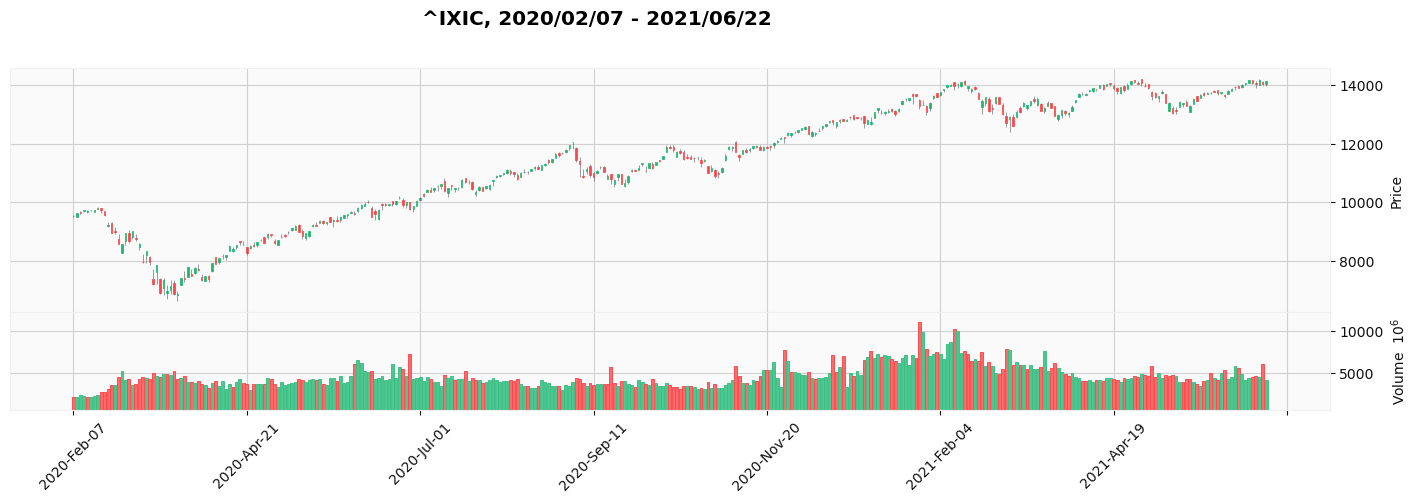

In [9]:

import mplfinance as mpf
import pandas as pd
import yahoo_fin.stock_info as yf
from datetime import date
from datetime import timedelta

ticker = "^IXIC"
start_date = date.today() - timedelta(days=500)
end_date = date.today() + timedelta(days=1)

start_date = start_date.strftime("%Y/%m/%d")
end_date= end_date.strftime("%Y/%m/%d")

# Default Interval is 1 day
data = yf.get_data(ticker, start_date = start_date, end_date= end_date,
                index_as_date= False)

data_candle = yf.get_data(ticker, start_date = start_date, end_date= end_date,
                index_as_date= True)

del data_candle['adjclose']
del data_candle['ticker']
data_candle.rename(columns={'open':'Open',
                            'high':'High',
                            'low':'Low',
                            'close': 'Close',
                            'volume': 'Volume'}, 
                            inplace=True)
print(data_candle)
kwargs = dict(type = 'candle', volume = True, figratio=(30,8), figscale=0.85)
mpf.plot(data_candle, **kwargs, style = 'yahoo', title = '{}, {} - {}'.format(ticker, start_date, end_date))

In [10]:
import pandas as pd
import numpy as np
import talib
import matplotlib.pyplot as plt

inputs = {
    'open': pd.Series(data['open']),
    'high': pd.Series(data['high']),
    'low': pd.Series(data['low']),
    'close': pd.Series(data['close']),
    'adjclose': pd.Series(data['adjclose']),
    'volume': pd.Series(data['volume'])
}

ModuleNotFoundError: No module named 'talib'

## Bandas de Bollinger

In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

In [75]:
enddate = date.datetime(2021,6,18)
startdate = date.datetime(2020,6,18)
tick = 'AAPL'
data = pdr.get_data_yahoo(tick, start = startdate, end = enddate)

In [76]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-18,88.362503,87.305000,87.852501,87.932503,96820400.0,87.343979
2020-06-19,89.139999,86.287498,88.660004,87.430000,264476000.0,86.844833
2020-06-22,89.864998,87.787498,87.834999,89.717499,135445200.0,89.117027
2020-06-23,93.095001,90.567497,91.000000,91.632500,212155600.0,91.019203
2020-06-24,92.197502,89.629997,91.250000,90.014999,192623200.0,89.412537


<AxesSubplot:xlabel='Date'>

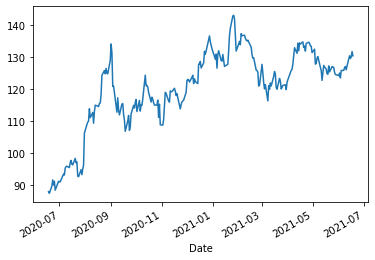

In [77]:
data.Close.plot()

In [78]:
def BBANDS(df,n):
    MA= pd.Series(pd.Series.rolling(df['Close'], n).mean())
    MSD=pd.Series(pd.Series.rolling(df['Close'], n).std())
    b1=MA + (MSD*2)
    B1= pd.Series(b1, name = 'BollingerSuperior')
    df= df.join(B1)
    b2= MA - (MSD*2)
    B2= pd.Series(b2, name = 'BollingerInferior')
    df = df.join(B2)
    b3= MA
    B3= pd.Series(b3, name = 'BollingerM_')
    df = df.join(B3)
    return df

In [79]:
df = BBANDS(data,20)

In [80]:
df2 = df[['Close','BollingerSuperior','BollingerInferior','BollingerM_']]

<AxesSubplot:xlabel='Date'>

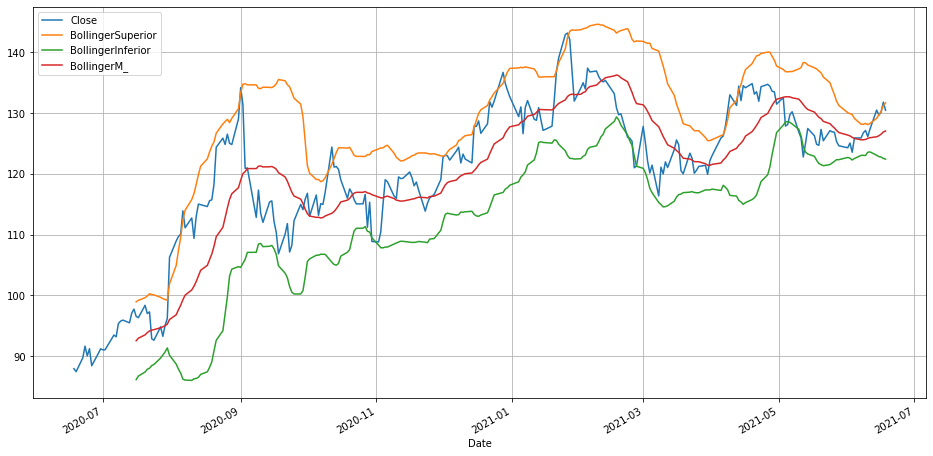

In [81]:
df2.plot(figsize = (16,8),grid=True)

In [82]:
a = df['BollingerSuperior']
b = df['BollingerInferior']

data.loc[(data['Close'] < a) & (data['Close'] > b), 'Comportamiento'] = 'Entre bandas'
data.loc[data['Close'] <b, 'Comportamiento'] = 'Cruce de banda inferior'
data.loc[data['Close'] >a, 'Comportamiento'] = 'Cruce de banda superior'

data.loc[(data['Close'] < a) & (data['Close'] > b), 'Recomendacion'] = '-'
data.loc[data['Close'] <b, 'Recomendacion'] = 'Se recomienda comprar la accion.'
data.loc[data['Close'] >a, 'Recomendacion'] = 'Se recomienda vender la accion'

data["Recomendacion"] = data["Recomendacion"].fillna("-")
data["Comportamiento"] = data["Comportamiento"].fillna("Sin informacion")

In [83]:
pd.set_option('display.max_rows', None)

In [84]:
data[['Close','Comportamiento', 'Recomendacion']]

,Close,Comportamiento,Recomendacion
Date,,,
2020-06-18,87.932503,Sin informacion,-
2020-06-19,87.430000,Sin informacion,-
2020-06-22,89.717499,Sin informacion,-
2020-06-23,91.632500,Sin informacion,-
2020-06-24,90.014999,Sin informacion,-
2020-06-25,91.209999,Sin informacion,-
2020-06-26,88.407501,Sin informacion,-
2020-06-29,90.445000,Sin informacion,-
2020-06-30,91.199997,Sin informacion,-


In [85]:
tabla=pd.DataFrame(a)
tabla2=pd.DataFrame(b)
tabla= tabla.join(tabla2).join(data['Close'])
tabla

,BollingerSuperior,BollingerInferior,Close
Date,,,
2020-06-18,NaN,NaN,87.932503
2020-06-19,NaN,NaN,87.430000
2020-06-22,NaN,NaN,89.717499
2020-06-23,NaN,NaN,91.632500
2020-06-24,NaN,NaN,90.014999
2020-06-25,NaN,NaN,91.209999
2020-06-26,NaN,NaN,88.407501
2020-06-29,NaN,NaN,90.445000
2020-06-30,NaN,NaN,91.199997


## Oscilador Estocástico

In [86]:
def STO(df, nK, nD, nS=1):
    SOk = pd.Series((df['Close'] - df['Low'].rolling(nK).min())/(df['High'].rolling(nK).max() - df['Low'].rolling(nK).min()), name = 'SOk'+str(nK) )
    SOd = pd.Series(SOk.ewm(ignore_na = False, span = nD, min_periods = nD -1, adjust = True).mean(), name = 'SOd'+str(nD))
    SOk = SOk.ewm(ignore_na = False, span = nS, min_periods = nS - 1 , adjust = True).mean()
    SOd = SOd.ewm(ignore_na = False, span = nS, min_periods = nS - 1 , adjust = True).mean()
    df = df.join(SOk)
    df = df.join(SOd)
    df['Recomendacion'] = 0
    df.loc[(((SOk < SOd) & (SOk.shift(1) > SOd.shift(1))) & (SOd > 0.8)),'Recomendacion'] = 'Vender'
    df.loc[(((SOk > SOd) & (SOk.shift(1) < SOd.shift(1))) & (SOd < 0.2)),'Recomendacion'] = 'Comprar'
    df.loc[ df['Recomendacion'] == 0, 'Recomendacion'] = '-'

    return df

In [87]:
df2 = STO(data, 14, 3)

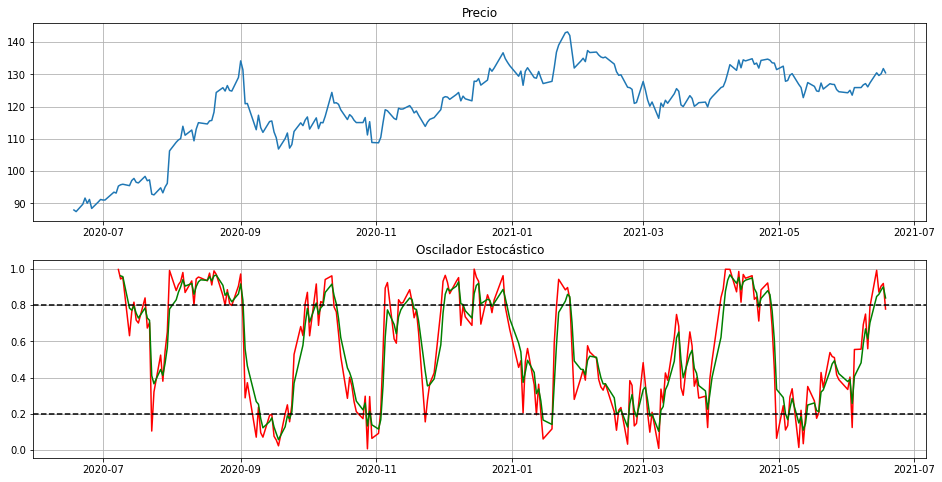

In [88]:
fig = plt.figure(figsize = (16,8))
ax1 = plt.subplot(211)
plt.plot(df2.Close)
plt.grid(True)
plt.title('Precio')
ax2 = plt.subplot(212, sharex=ax1)
plt.plot(df2.SOk14, color = 'r')
plt.plot(df2.SOd3, color = 'g')
plt.axhline(y=0.8, color = 'k', linestyle = '--')
plt.axhline(y=0.2, color = 'k', linestyle = '--')
plt.title('Oscilador Estocástico')
plt.grid(True)
plt.show()

In [89]:

df2[['Close', 'Recomendacion']]

,Close,Recomendacion
Date,,
2020-06-18,87.932503,-
2020-06-19,87.430000,-
2020-06-22,89.717499,-
2020-06-23,91.632500,-
2020-06-24,90.014999,-
2020-06-25,91.209999,-
2020-06-26,88.407501,-
2020-06-29,90.445000,-
2020-06-30,91.199997,-


## ROC

In [90]:
def ROC(df, n):
    M = df['Close'].diff(n - 1)
    N = df['Close'].shift(n - 1)
    ROC = pd.Series(M/N, name = 'ROC_' + str(n))
    df = df.join(ROC)
    Cr = pd.Series(df['Close'].shift(1), name = 'Cr')
    df = df.join(Cr)
    ROCr = pd.Series(ROC.shift(1), name = 'ROC_' + str(n) + '_r')
    df = df.join(ROCr)
    df['Recomendación'] = '-'
    
    df.loc[((ROC > 0) & (ROCr < 0)), 'Recomendación'] = 'Se recomienda COMPRAR la acción.'
    df.loc[((ROC < 0) & (ROCr > 0)), 'Recomendación'] = 'Se recomienda VENDER la acción.'
    df.loc[((df['Close'] < Cr) & ((ROC > 0) & (ROCr < 0) & (ROC > ROCr))), 'Recomendación'] = 'Se recomienda COMPRAR la acción. (DIV)'
    df.loc[((df['Close'] > Cr) & ((ROC < 0) & (ROCr > 0) & (ROC < ROCr))), 'Recomendación'] = 'Se recomienda VENDER la acción. (DIV)'    
    
    return df


df2 = ROC(data, 10)

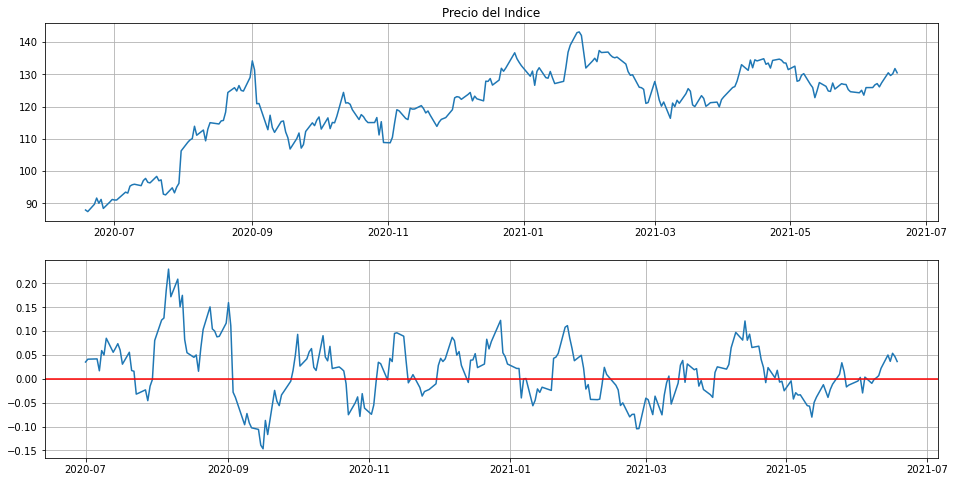

,Close,ROC_10,Recomendación
Date,,,
2020-07-23,92.845001,-0.032058,Se recomienda VENDER la acción.
2020-07-31,106.260002,0.080345,Se recomienda COMPRAR la acción.
2020-09-03,120.879997,-0.028061,Se recomienda VENDER la acción.
2020-09-29,114.089996,0.017480,Se recomienda COMPRAR la acción. (DIV)
2020-10-22,115.750000,-0.010430,Se recomienda VENDER la acción.
2020-11-05,119.029999,0.034684,Se recomienda COMPRAR la acción.
2020-11-09,116.320000,-0.002401,Se recomienda VENDER la acción.
2020-11-10,115.970001,0.042896,Se recomienda COMPRAR la acción. (DIV)
2020-11-18,118.029999,-0.008401,Se recomienda VENDER la acción.


In [91]:
fig = plt.figure(figsize = (16,8))
plt.subplot(2, 1, 1)
plt.plot(df2.Close)
plt.title('Precio del Indice')
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(df2.ROC_10)
plt.axhline(y=0, color= 'r')
plt.grid()
plt.show()
df2.loc[df2['Recomendación'] != '-',['Close', 'ROC_10', 'Recomendación']]